<a href="https://colab.research.google.com/github/seoyun2/AIFFEL/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TIPS Visualization

## 데이터 준비

Seaborn의 `load_dataset()` 메소드를 통해 유명 예제 데이터를 다운로드 받을 수 있다. [연습용 데이터 repo](https://github.com/mwaskom/seaborn-data)

여러 데이터들 중에서 종업원들의 tip을 정리한 데이터 셋인 [tips](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv)를 통해 시각화를 해보자.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

tips = sns.load_dataset("tips")

In [3]:
tips = pd.read_csv('/content/tips.csv')

## EDA

In [4]:
df = pd.DataFrame(tips)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.shape

(244, 7)

In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


tips는 결측치가 없는 데이터인 것을 알 수 있다. 

데이터 변수들 중에서 `sex`, `smoker`, `day`, `time`이 범주(category)형 데이터고 `tips`, `total_bill`, `size`는 수치형 데이터이지만 `size`는 테이블 인원을 의미하니까 범주형 데이터로 봐야한다. 

범주형 변수의 카테고리별 개수를 알아보자. 

In [8]:
print(df['sex'].value_counts())
print("===========================")


print(df['time'].value_counts())
print("===========================")


print(df['smoker'].value_counts())
print("===========================")


print(df['day'].value_counts())
print("===========================")


print(df['size'].value_counts())
print("===========================")

Male      157
Female     87
Name: sex, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64


### 범주형 데이터

범주형 데이터는 주로 막대 그래프를 사용하여 시각화한다.  `sex`, `smoker`, `day`, `time`, `size` 변수를 시각화해보자. 



#### Pandas & Matplotlib

matplotlib에 데이터를 인자로 넣기 위해선 데이터 분할이 필요하다. 

In [9]:
#df의 첫 5행을 확인해봅시다. 
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
grouped = df['tip'].groupby(df['sex'])
print('\"MEAN\"',grouped.mean())
print('-------------------------------')
print('\"SIZE\"',grouped.size())

"MEAN" sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64
-------------------------------
"SIZE" sex
Female     87
Male      157
Name: tip, dtype: int64


성별에 따른 팁 액수의 평균을 막대그래프로 나타내보자.

In [11]:
import numpy as np
sex = dict(grouped.mean()) #평균 데이터를 딕셔너리 형태로 변경
x = list(sex.keys())  
y = list(sex.values())

print('x :', x)
print('y :', y)

x : ['Female', 'Male']
y : [2.833448275862069, 3.0896178343949043]


Text(0.5, 1.0, 'Tip by Sex')

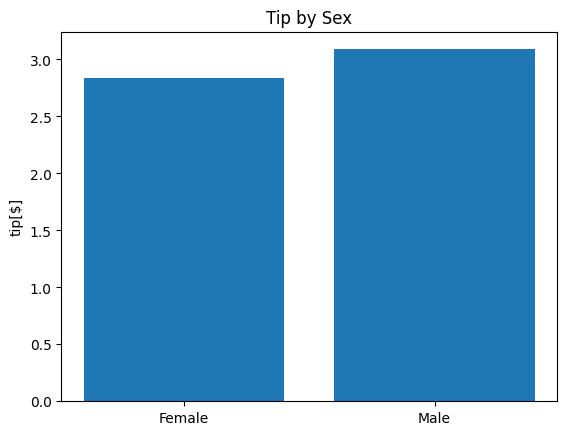

In [12]:
import matplotlib.pyplot as plt

plt.bar(x = x, height = y)
plt.ylabel('tip[$]')
plt.title('Tip by Sex')

#### Seaborn & Matplotlib

Text(0.5, 1.0, 'Tip by sex')

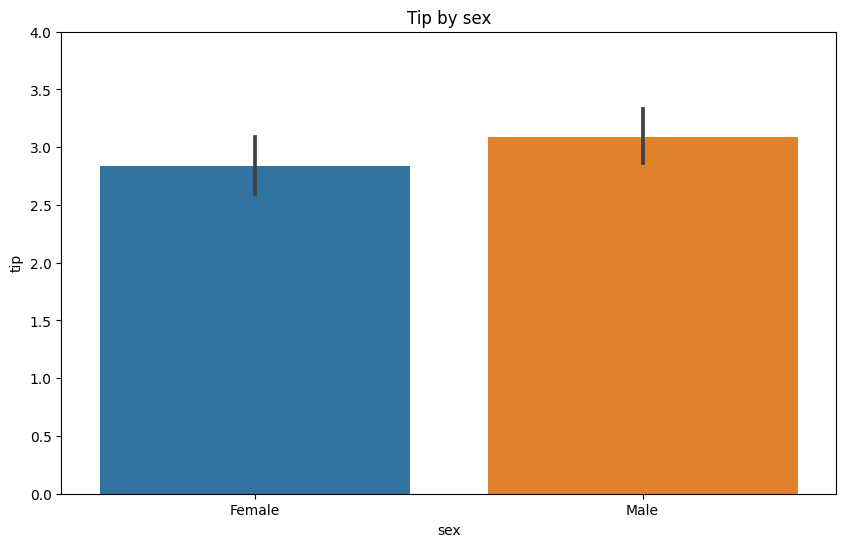

In [13]:
plt.figure(figsize=(10,6)) # 도화지 사이즈
sns.barplot(data=df, x='sex', y='tip')
plt.ylim(0, 4) # y값의 범
plt.title('Tip by sex') # 그래프 제목

**요일**에 따른 tips의 그래프

Text(0.5, 1.0, 'Tip by day')

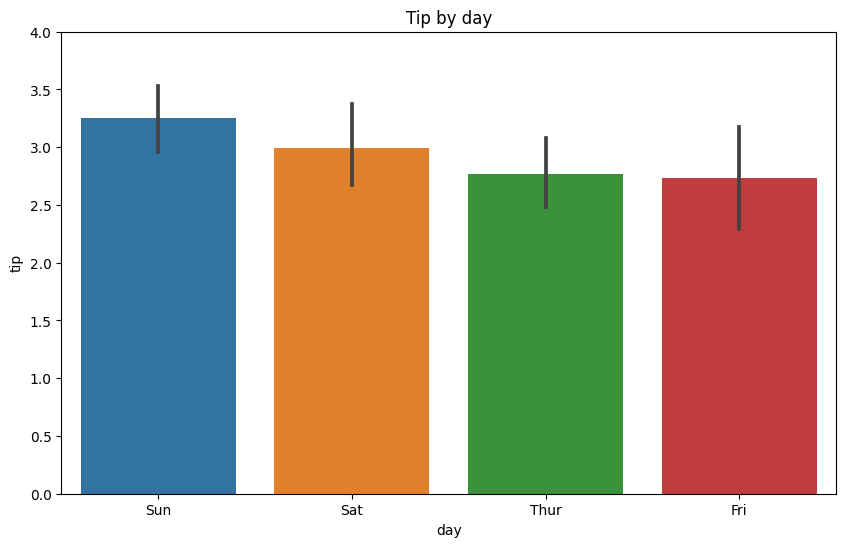

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day', y='tip')
plt.ylim(0, 4)
plt.title('Tip by day')

Text(0.5, 1.0, 'Sex ViolinPlot')

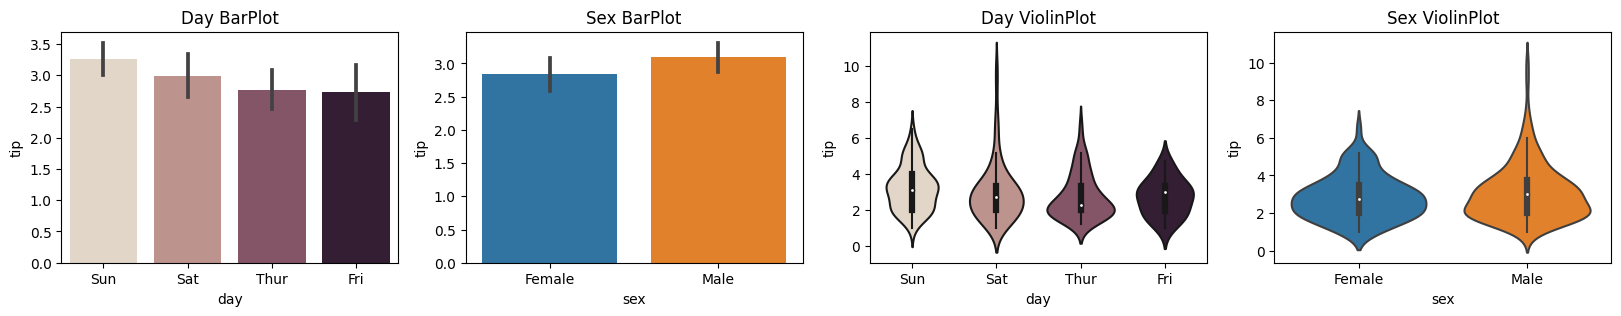

In [15]:
fig = plt.figure(figsize=(20,3))

ax1 = fig.add_subplot(1,4,1)
sns.barplot(data=df, x='day', y='tip',palette="ch:.25")
plt.title('Day BarPlot')

ax2 = fig.add_subplot(1,4,2)
sns.barplot(data=df, x='sex', y='tip')
plt.title('Sex BarPlot')

ax3 = fig.add_subplot(1,4,3)
sns.violinplot(data=df, x='day', y='tip',palette="ch:.25")
plt.title('Day ViolinPlot')

ax4 = fig.add_subplot(1,4,4)
sns.violinplot(data=df, x='sex', y='tip')
plt.title('Sex ViolinPlot')

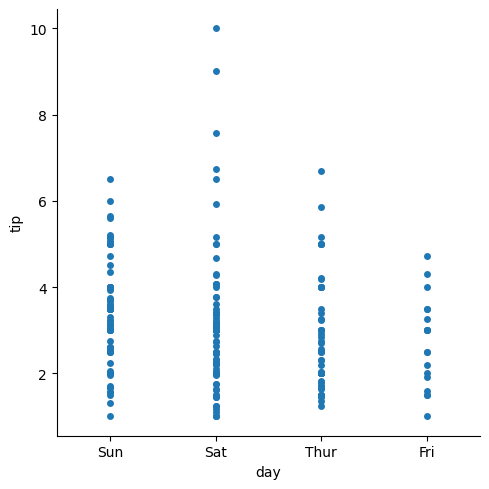

In [16]:
sns.catplot(x="day", y="tip", jitter=False, data=tips)

### 수치형 데이터 

수치형 데이터는 **산점도, 선** 그래프가 가장 적당하다. `total_bill`에 따른 tips 데이터를 시각화해보자. 

#### 산점도(scatter plot)
hue인자에 'day'를 주어 요일(day)에 따른 tip과 total_bill의 관계를 시각화해 보자.

<Axes: xlabel='total_bill', ylabel='tip'>

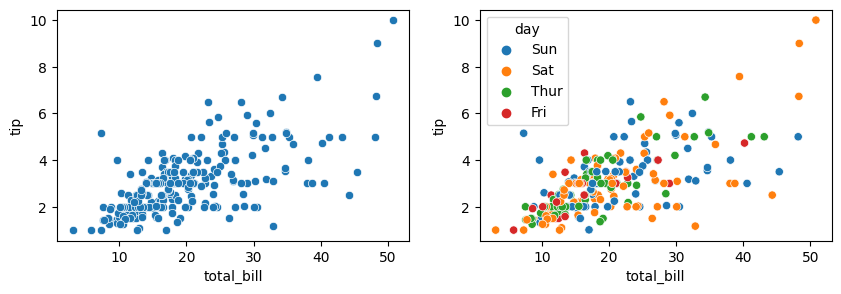

In [17]:
fig = plt.figure(figsize=(10,3))

ax1 = fig.add_subplot(1,2,1)
sns.scatterplot(data=df , x='total_bill', y='tip', palette="ch:r=-.2,d=.3_r")

ax2 = fig.add_subplot(1,2,2)
sns.scatterplot(data=df , x='total_bill', y='tip', hue='day')

#### 선 그래프(line graph)

[ 1.09966485  0.87261847 -1.60907273 -1.3071038   0.18121156  1.12250367
  1.04731127  1.92721955  2.56245628  2.24118644  3.04693678  2.84066705
  1.92652857  0.24317021 -0.08672392  1.67681734  0.3710742  -0.41828185
 -1.49860532  0.04469631  0.42079421  1.18373097  1.48727461  1.32462646
  1.54432022  1.53151213 -0.10674551  0.6547825  -0.86002572 -2.02210788
 -2.84198525 -1.0005542  -3.36231832 -3.88159645 -4.82131498 -1.59715924
 -1.92214208 -1.26668107 -1.78986425 -2.36504117 -1.89642979 -2.87416049
 -2.08174008 -1.79426773 -2.40129802 -1.93703913 -1.70774644 -2.78952809
 -1.6886338  -1.58318168]


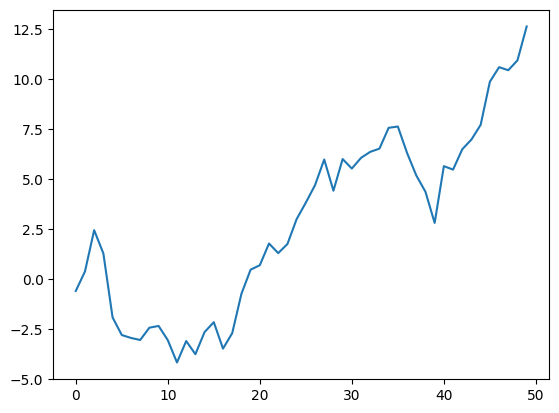

In [18]:
#np.random.randn 함수는 표준 정규분포에서 난수를 생성하는 함수
#cumsum()은 누적합을 구하는 함수
print(np.random.randn(50).cumsum())
plt.plot(np.random.randn(50).cumsum())
plt.show()

Seaborn을 활용하면 다음과 같이 그릴 수 있습니다.

<Axes: >

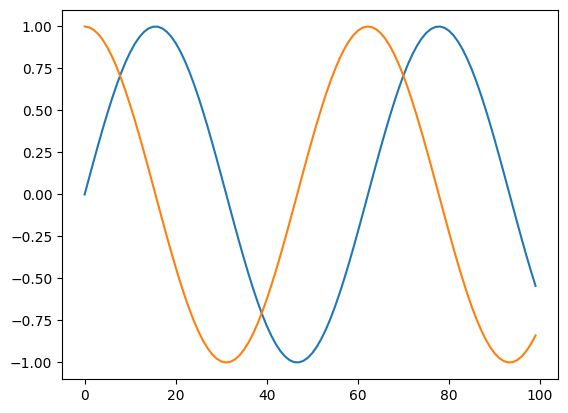

In [19]:
x = np.linspace(0, 10, 100) 
sns.lineplot(np.sin(x))
sns.lineplot(np.cos(x))

#### 히스토그램(histogram)

아래와 같은 데이터를 만들어 히스토그램을 만들어보자.

- x1은 평균은 100이고 표준편차는 15인 정규분포를 따름
- x2는 평균은 130이고 표준편차는 15인 정규분포를 따름
- 도수를 50개의 구간으로 표시하며, 확률 밀도가 아닌 빈도로 표기

Text(0.5, 1.0, 'Two Frequency Distributions')

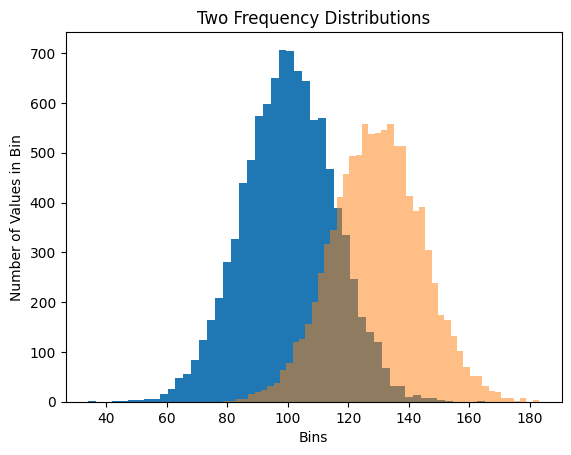

In [20]:
#그래프 데이터 
mu1, mu2, sigma = 100, 130, 15
x1 = mu1 + sigma*np.random.randn(10000)
x2 = mu2 + sigma*np.random.randn(10000)

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
patches = ax1.hist(x1, bins=50, density=False) #bins는 x값을 총 50개 구간으로 나눔
patches = ax1.hist(x2, bins=50, density=False, alpha=0.5)
ax1.xaxis.set_ticks_position('bottom') # x축의 눈금을 아래 표시 
ax1.yaxis.set_ticks_position('left') #y축의 눈금을 왼쪽에 표시

# 라벨, 타이틀 달기
plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
ax1.set_title('Two Frequency Distributions')

tips 데이터를 히스토그램으로 표현해보자. 

**커널 밀도 그래프 `kind = 'kde`** [KDE](https://darkpgmr.tistory.com/147#:~:text=Kernel%20Density%20Estimation%20(%EC%BB%A4%EB%84%90%20%EB%B0%80%EB%8F%84%20%EC%B6%94%EC%A0%95)%20%EB%B0%A9%EB%B2%95%EC%9D%80%20non%2D,%EC%9D%84%20%EA%B0%9C%EC%84%A0%ED%95%9C%20%EB%B0%A9%EB%B2%95%EC%9D%B4%EB%8B%A4)


Text(0.5, 1.0, 'Tip percent')

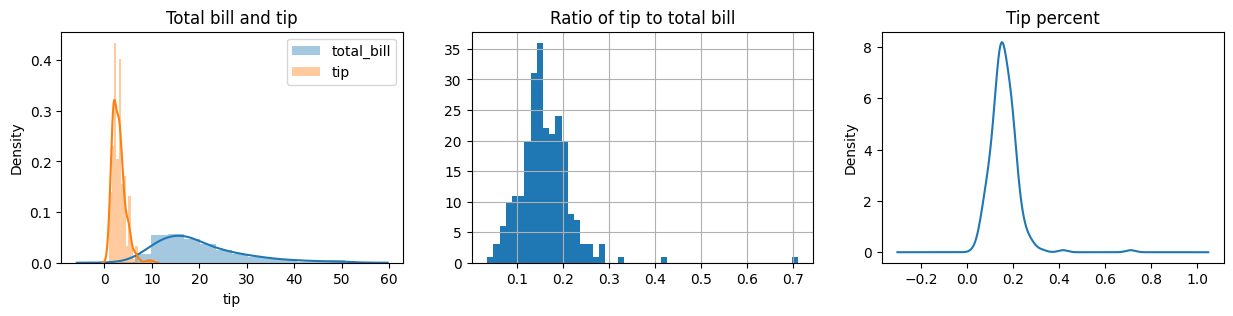

In [21]:
fig = plt.figure(figsize=(15,3))

ax1 = fig.add_subplot(1,3,1)
sns.distplot(df['total_bill'], label = "total_bill")
sns.distplot(df['tip'], label = "tip").legend()# legend()를 이용하여 label을 표시
plt.title('Total bill and tip')

ax2 = fig.add_subplot(1,3,2)
df['tip_pct'] = df['tip'] / df['total_bill']
df['tip_pct'].hist(bins=50)
plt.title('Ratio of tip to total bill')

ax3 = fig.add_subplot(1,3,3)
df['tip_pct'].plot(kind='kde')
plt.title('Tip percent')